In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
new_data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]].copy()

In [12]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,28,1,0,7.2500,2,0
1,1,0,51,1,0,71.2833,0,1
2,3,0,34,0,0,7.9250,2,1


In [11]:
new_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

# Encoding data

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
new_data["Sex"] = le.fit_transform(new_data["Sex"])

In [9]:
le2 = LabelEncoder()
new_data["Embarked"] = le2.fit_transform(new_data["Embarked"])

In [10]:
le3 = LabelEncoder()
new_data["Age"] = le3.fit_transform(new_data["Age"])

In [ ]:
# Feature Importance Comparison
#Use at least 3 models and compare the top 5 most important features from each:
    #Logistic Regression
    #Random Forest
    #Decision Tree

In [13]:
x=new_data.iloc[:,:-1]
y=new_data["Survived"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.2,random_state = 42)

# model  implementation

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [20]:
lr.score(x_train,y_train)*100 ,lr.score(x_test,y_test)*100

(84.26966292134831, 80.50490883590463)

In [21]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(100.0, 78.40112201963534)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 73.35203366058906)

# Features Selection 

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [26]:
fs =SequentialFeatureSelector(lr,k_features = 5 , forward = True)
fs.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          k_features=(5, 5), scoring='accuracy')

In [27]:
fs.feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [28]:
fs.k_feature_names_

('Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked')

In [29]:
fs.k_score_

np.float64(0.8268253968253967)

In [30]:
fs1 =SequentialFeatureSelector(rf,k_features = 5 , forward = True)
fs1.fit(x_train,y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(), k_features=(5, 5),
                          scoring='accuracy')

In [32]:
fs1.feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [33]:
fs1.k_feature_names_

('Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked')

In [34]:
fs1.k_score_

np.float64(0.8101587301587301)

In [35]:
fs2 =SequentialFeatureSelector(dt,k_features = 5 , forward = True)
fs2.fit(x_train,y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=(5, 5),
                          scoring='accuracy')

In [36]:
fs2.feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [37]:
fs2.k_feature_names_

('Pclass', 'Sex', 'Age', 'Parch', 'Embarked')

In [38]:
fs2.k_score_

np.float64(0.7763492063492062)

# Confusion tree

In [ ]:
#Model Evaluation
#Evaluate all 3 models using:
    #Accuracy
    #Precision, Recall, F1-Score
    #Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score ,accuracy_score

In [41]:
cf = confusion_matrix(y_test,lr.predict(x_test))
cf

array([[391,  45],
       [ 94, 183]])

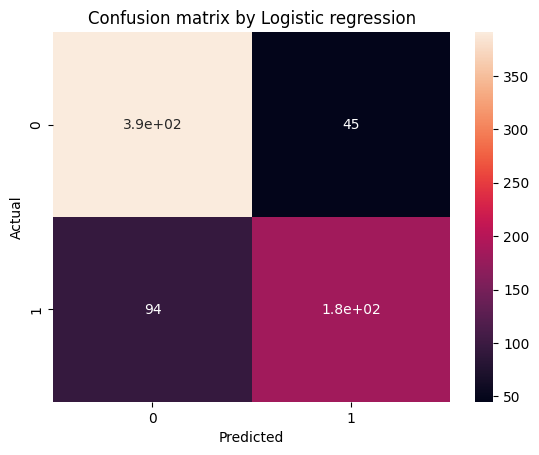

In [43]:
sns.heatmap(cf,annot = True)
plt.title("Confusion matrix by Logistic regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [80]:
ps = precision_score(y_test,lr.predict(x_test))
ps*100

80.26315789473685

In [79]:
rs = recall_score(y_test,lr.predict(x_test))
rs*100

66.06498194945848

In [78]:
f1s = f1_score(y_test,lr.predict(x_test))
f1s*100

72.47524752475248

In [77]:
ac =  accuracy_score(y_test,lr.predict(x_test))
ac*100

80.50490883590463

In [54]:
cf1 = confusion_matrix(y_test,rf.predict(x_test))
cf1

array([[374,  62],
       [ 92, 185]])

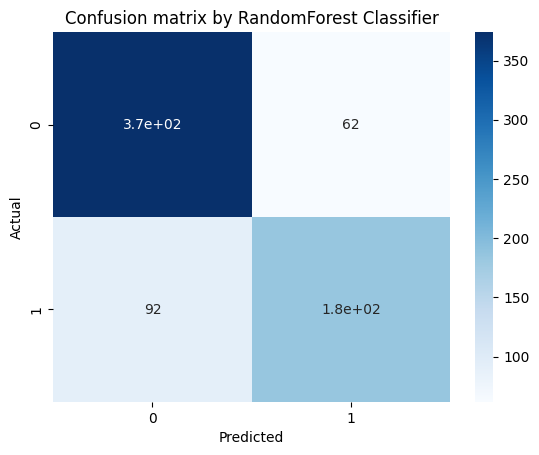

In [61]:
sns.heatmap(cf1,annot = True,cmap = "Blues")
plt.title("Confusion matrix by RandomForest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [76]:
psr = precision_score(y_test,rf.predict(x_test))
psr*100

74.89878542510121

In [75]:
rsr = recall_score(y_test,rf.predict(x_test))
rsr*100

66.78700361010831

In [74]:
f1sr = f1_score(y_test,rf.predict(x_test))
f1sr*100

70.61068702290076

In [73]:
acr =  accuracy_score(y_test,rf.predict(x_test))
acr*100

78.40112201963534

In [60]:
cf2 = confusion_matrix(y_test,dt.predict(x_test))
cf2

array([[342,  94],
       [ 96, 181]])

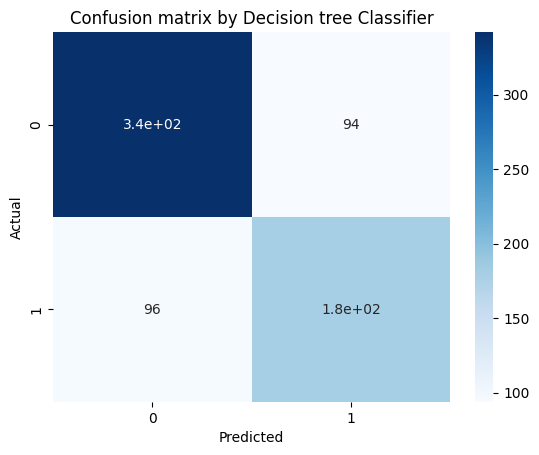

In [62]:
sns.heatmap(cf2,annot = True,cmap = "Blues")
plt.title("Confusion matrix by Decision tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
psd = precision_score(y_test,dt.predict(x_test))
psd*100

65.81818181818181

In [71]:
rsd = recall_score(y_test,dt.predict(x_test))
rsd*100

65.34296028880865

In [70]:
f1sd = f1_score(y_test,dt.predict(x_test))
f1sd*100

65.57971014492753

In [69]:
acd =  accuracy_score(y_test,dt.predict(x_test))
acd*100

73.35203366058906

# Hyperparameter tunning

In [ ]:
#Hyperparameter Tuning
#Perform Grid Search for Random Forest:
#Parameters to tune:
    #n_estimators: [50, 100, 200]
    #max_depth: [None, 5, 10]
    #min_samples_split: [2, 5]

In [83]:
from sklearn.model_selection import GridSearchCV

In [95]:
df = {"n_estimators":[50,100,200],"max_depth":[None,5,10],"min_samples_split":[2,5]}

In [96]:
gd = GridSearchCV(RandomForestClassifier(),param_grid = df)
gd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]})

In [102]:
print("Best score:" , gd.best_score_)

Best score: 0.8271428571428572


In [101]:
print("Best Parameters:", gd.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


# Cross validation 

In [ ]:
#Cross-Validation
#Perform 5-fold cross-validation for all 3 models using cross_val_score.

In [105]:
from sklearn.model_selection import cross_val_score

In [110]:
cross_val_score(LogisticRegression(max_iter=2000),x,y,cv = 5)

array([0.73184358, 0.79213483, 0.79213483, 0.78651685, 0.8258427 ])

In [111]:
cross_val_score(RandomForestClassifier(),x,y,cv = 5)

array([0.77653631, 0.80337079, 0.83146067, 0.7752809 , 0.82022472])

In [112]:
cross_val_score(DecisionTreeClassifier(),x,y,cv = 5)

array([0.74301676, 0.79775281, 0.79775281, 0.7247191 , 0.80337079])